# Wordle Solver
**Summary:** This Python script aims to solve the daily [Wordle](https://www.nytimes.com/games/wordle/index.html) puzzle as effectively as possible.

100% (2310 of 2310) |####################| Elapsed Time: 0:01:39 Time:  0:01:39


count    2310.000000
mean        4.117316
std         1.050729
min         2.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         9.000000
dtype: float64

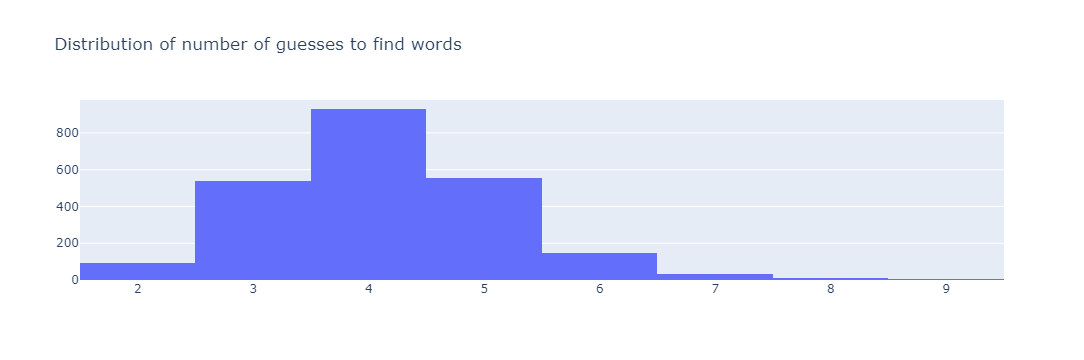

In [2]:
#Before running, ensure the kernel is set to the virtual environment "myvenv"

#Import top level function
from helper_functions.process_user_inputs import run_wordle_solver

#Run wordle solver
solution=run_wordle_solver(mode="all_words",next_word_selection="random",rag_colours=None)

#Options for "mode": "real_python", "one_word", "100_words", "all_words"
#Options for "next_word_selection": "random","rank","brute_force_simple","brute_force_extended"

#Note:
# -- "real_python" runs the wordle solver in python to help solve the real wordle of the day...
#    ...using user RAG inputs for each successive word
# -- "one_word" runs the wordle solver for just one specific word
# -- "100_words" runs the wordle solver for 100 words. this is for initial testing, and is...
#    ...much quicker to run than "all_words"
# -- "all_words" runs the wordle solver across all available 5-letter...
#    ...words. This is used to assess overall performance. 

#If using "one_word" mode, then the attributes of the solution object are:
# - solution.actual_word = the actual word that we are trying to solve, which is currently randomly selected
# - solution.final_guess = the word that we thing is the actual word, based on the output of our algorithms
# - solution.n_guesses = the total number of guesses that it has taken to get to the final guess
# - solution.t_solve = the total number of time that it has taken to get to the final guess

#If using "all_words" or "100_words" mode, then the attributes of the solution object are:
# - solution.n_guesses_all_words = a list of the number of guesses that it took to solve each word
# - solution.t_solve_all_words = the total time that it took to solve all words in the dataset
# - solution.basic_stats = basic descriptive statistics on the number of guesses for all words, including average and range

In [1]:
from english_words import english_words_lower_alpha_set

In [3]:
type(english_words_lower_alpha_set)

set

In [8]:
import pandas as pd
#csv_path = r"OneDrive\Documents\GitHub\wordle_solver\codebase\flask_app\misc\full_word_lists\original_wordle_list.csv"
csv_path=r'data/full_word_lists/original_wordle_list.csv'
df = pd.read_csv(csv_path)
df_as_list=list(df['all_wordle_words'])

In [3]:
word1="hello"
word2="hoof"
word3="yoooo"
mylist=[]
mylist.append(word1)
mylist.append(word2)
mylist.append(word3)
mylist

['hello', 'hoof', 'yoooo']

In [17]:
import numpy as np
x=np.array(df_as_list)

AttributeError: 'list' object has no attribute 'flatten'

In [22]:
y=x.flatten()
list(x)

['cigar',
 'rebut',
 'sissy',
 'humph',
 'awake',
 'blush',
 'focal',
 'evade',
 'naval',
 'serve',
 'heath',
 'dwarf',
 'model',
 'karma',
 'stink',
 'grade',
 'quiet',
 'bench',
 'abate',
 'feign',
 'major',
 'death',
 'fresh',
 'crust',
 'stool',
 'colon',
 'abase',
 'marry',
 'react',
 'batty',
 'pride',
 'floss',
 'helix',
 'croak',
 'staff',
 'paper',
 'unfed',
 'whelp',
 'trawl',
 'outdo',
 'adobe',
 'crazy',
 'sower',
 'repay',
 'digit',
 'crate',
 'cluck',
 'spike',
 'mimic',
 'pound',
 'maxim',
 'linen',
 'unmet',
 'flesh',
 'booby',
 'forth',
 'first',
 'stand',
 'belly',
 'ivory',
 'seedy',
 'print',
 'yearn',
 'drain',
 'bribe',
 'stout',
 'panel',
 'crass',
 'flume',
 'offal',
 'agree',
 'error',
 'swirl',
 'argue',
 'bleed',
 'delta',
 'flick',
 'totem',
 'wooer',
 'front',
 'shrub',
 'parry',
 'biome',
 'lapel',
 'start',
 'greet',
 'goner',
 'golem',
 'lusty',
 'loopy',
 'round',
 'audit',
 'lying',
 'gamma',
 'labor',
 'islet',
 'civic',
 'forge',
 'corny',
 'moult',


In [6]:
flatten(df_as_list)

NameError: name 'flatten' is not defined

In [9]:
df_as_list

['cigar',
 'rebut',
 'sissy',
 'humph',
 'awake',
 'blush',
 'focal',
 'evade',
 'naval',
 'serve',
 'heath',
 'dwarf',
 'model',
 'karma',
 'stink',
 'grade',
 'quiet',
 'bench',
 'abate',
 'feign',
 'major',
 'death',
 'fresh',
 'crust',
 'stool',
 'colon',
 'abase',
 'marry',
 'react',
 'batty',
 'pride',
 'floss',
 'helix',
 'croak',
 'staff',
 'paper',
 'unfed',
 'whelp',
 'trawl',
 'outdo',
 'adobe',
 'crazy',
 'sower',
 'repay',
 'digit',
 'crate',
 'cluck',
 'spike',
 'mimic',
 'pound',
 'maxim',
 'linen',
 'unmet',
 'flesh',
 'booby',
 'forth',
 'first',
 'stand',
 'belly',
 'ivory',
 'seedy',
 'print',
 'yearn',
 'drain',
 'bribe',
 'stout',
 'panel',
 'crass',
 'flume',
 'offal',
 'agree',
 'error',
 'swirl',
 'argue',
 'bleed',
 'delta',
 'flick',
 'totem',
 'wooer',
 'front',
 'shrub',
 'parry',
 'biome',
 'lapel',
 'start',
 'greet',
 'goner',
 'golem',
 'lusty',
 'loopy',
 'round',
 'audit',
 'lying',
 'gamma',
 'labor',
 'islet',
 'civic',
 'forge',
 'corny',
 'moult',


In [35]:
from helper_functions.other_helper_functions.test import get_wordle_word_list
words=get_wordle_word_list()
words

['cigar',
 'rebut',
 'sissy',
 'humph',
 'awake',
 'blush',
 'focal',
 'evade',
 'naval',
 'serve',
 'heath',
 'dwarf',
 'model',
 'karma',
 'stink',
 'grade',
 'quiet',
 'bench',
 'abate',
 'feign',
 'major',
 'death',
 'fresh',
 'crust',
 'stool',
 'colon',
 'abase',
 'marry',
 'react',
 'batty',
 'pride',
 'floss',
 'helix',
 'croak',
 'staff',
 'paper',
 'unfed',
 'whelp',
 'trawl',
 'outdo',
 'adobe',
 'crazy',
 'sower',
 'repay',
 'digit',
 'crate',
 'cluck',
 'spike',
 'mimic',
 'pound',
 'maxim',
 'linen',
 'unmet',
 'flesh',
 'booby',
 'forth',
 'first',
 'stand',
 'belly',
 'ivory',
 'seedy',
 'print',
 'yearn',
 'drain',
 'bribe',
 'stout',
 'panel',
 'crass',
 'flume',
 'offal',
 'agree',
 'error',
 'swirl',
 'argue',
 'bleed',
 'delta',
 'flick',
 'totem',
 'wooer',
 'front',
 'shrub',
 'parry',
 'biome',
 'lapel',
 'start',
 'greet',
 'goner',
 'golem',
 'lusty',
 'loopy',
 'round',
 'audit',
 'lying',
 'gamma',
 'labor',
 'islet',
 'civic',
 'forge',
 'corny',
 'moult',
